# Building a sigmoid neuron

### Introduction

In the last lesson, we changed our perceptron so that it no longer returns an all or nothing response -- 1 or 0, but rather returns a range of values, based on how far the summation is from the decision boundary.  Because we currently predict depending on if our summation is positive or negative, the closer a number is to zero, the closer it is to the decision boundary, and thus the less confident we are in that corresponding prediction.

In [1]:
def perceptron(features):
    x_1 = features[0]
    x_2 = features[1]
    linear_component = -0.00802333*x_1 +  -3.47361781*x_2 + 5.86
    return linear_component

### Returning a range of values

Our code is currently looking quite good, so it's time to add a new feature.  Instead of returning a number between positive and negative infinity, let's change our function so we return a number between just 1 and 0 based on the strength of our conviction.  So for example, if we were confident in a 1, where we previously returned a large positive number, we would now return a number close to 1 (like .98).  And instead of returning a large negative number for observations we are confident are a 0, we now return a number close to 0, like .02.


To accomplish this, we'll make use of the sigmoid function.  This is the sigmoid function.

This is the sigmoid function:

$S(x) = \frac{1}{1 + e^{-x}} $

This function accomplishes just what we want.  It brings large positive numbers close to 1, and large negative numbers close to 0.  Let's think about why.

### Working with the Sigmoid Function

Let's think about what this function does.  

$S(x) = \frac{1}{1 + e^{-x}} $

When $x$ becomes large, say $1,000$, then we have:

$S(-1000) = \frac{1}{1 + e^{-1000}} = \frac{1}{1 + 1/e^{1000}}  = \frac{1}{1 + small\_num} = 1$

And when x is a large negative number, we have: 

$S(1000) = \frac{1}{1 + e^{1000}} = \frac{1}{1 + e^{1000}}  = \frac{1}{1 + big\_num} = 0$

Finally, when $x = 0$ we have: 

$S(0) = \frac{1}{1 + e^{0}} = \frac{1}{1 + 1} = \frac{1}{2}$ 

In [86]:
def sigmoid(value):
    return 1/(1 + np.exp(-value))

In [103]:
sigmoid(-7)
# 0.000911

sigmoid(7)
# 0.9990

sigmoid(0)
# 0.5

0.5

If we were to look at this in a graph, it would look like the following.  

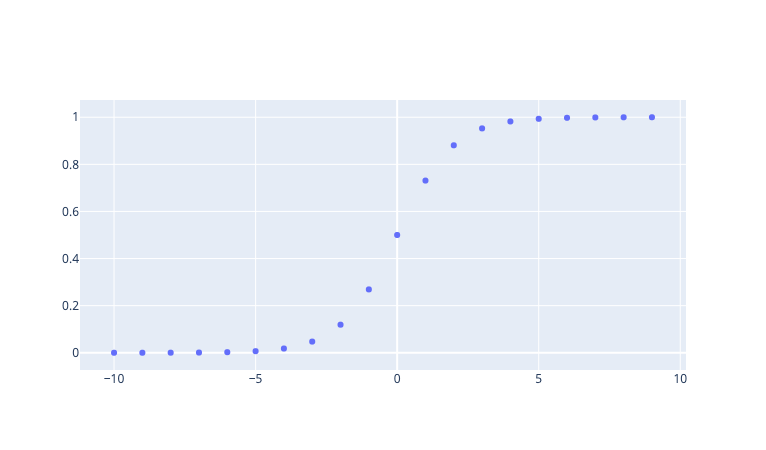

In [108]:
import plotly.io as pio
import plotly.graph_objects as go
x_values = list(range(-10, 10))
y_values = [sigmoid(val) for val in x_values]
go.Figure(go.Scatter(x=x_values, y = y_values, mode = 'markers'))

So we can see that the sigmoid function takes values between positive and negative infinity and plots those numbers between 0 and 1.  

> And now we can feed that output into our sigmoid function.

In [115]:
sigmoid(sweetness_linearity([3, 1]))

0.8807970779778823

So because this number is above .5, we have a determination that the input is sweet. 

### A couple of terms

Let's take a moment to describe what we have arrived at.  We have built a **sigmoid neuron**. 

> A sigmoid neuron takes multiple inputs and uses the sigmoid function to return a number between 0 and 1.

Our sigmoid neuron consists of two components: a linear function, which is then passed into a non-linear function (sigmoid).  

> A **linear function** is any function where each of the variables are raised to the term 1 or 0.

Looking at our function, we have: 

In [116]:
def sweetness_linearity(evidence):
    summation = 2*evidence[0] + 1*evidence[1] - 5
    return summation

$f(x) = w_1x_1 + w_2x_2 + b $

So no term is written raised to an exponent greater than 1.  But we pass this output into a **non-linear function**.  Here that **non-linear function** is the sigmoid function.    

$S(x) = \frac{1}{1 + e^{-x}} $

This non-linear function, is also called the neuron's **activation function**.  We call it the activation function because it determines the degree to which our neuron will fire.  Or according to Wikipedia:

> An **activation function** defines the output of that neuron given an input or set of inputs

So for to sum up our sigmoid neuron is a linear function wrapped in a sigmoid function: 

In [117]:
sigmoid(sweetness_linearity([1, 4]))

0.7310585786300049

Or to write it mathematically: 

$z(f(x)) =  \frac{1}{1 + e^{-f(x)}} $

where $f(x) = w_1x_1 + w_2x_2 ... w_nx_n + b $

This is the hypothesis function of our sigmoid neuron.

### Summary

### Resources
* [neural network image](http://news.mit.edu/2017/new-tool-offers-snapshots-neuron-activity-0626)
* [For analogy of neuron to judge](http://neuralnetworksanddeeplearning.com/chap1.html)